# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2020/21)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 02.11.2020


### Zweiter Vorlesungsteil:  
#### Zufällige komplexe Netzwerke (random networks)


## Einführung

Aufgrund ihrer unterschiedlichen Eigenschaften unterscheidet man die folgenden Netzwerk-Klassen: Zufällige Netzwerke (Random Networks: Die einzelnen Kanten bei zufälligen Netzwerke werden von den Knoten (Spielern) nach einem rein zufälligen Muster ausgewählt), Kleine Welt-Netzwerke (Small World Networks, Kleine Welt-Netzwerke zeichnen sich durch einen kleinen Wert der durchschnittlichen kürzesten Verbindung zwischen den Knoten des Netzwerkes und einem großen Wert des Clusterkoeffizienten aus), Exponentielle Netzwerke (Exponential Networks) und Skalenfreie Netzwerke (Scale-Free Networks). 

Bei einigen Modellnetzwerken können analytische Ergebnisse gewonnen werden. Im Folgenden betrachten wir die Klasse der zufälligen Netzwerke. Die einzelnen Kanten bei zufälligen Netzwerken werden von den Knoten (Spielern) nach einem rein zufälligen Muster ausgewählt. Im Erdos-Renyi Modell (Erdos and Renyi, 1959) werden N Knoten zufällig mit L ungerichteten Kanten verbunden. Die Wahrscheinlichkeit p, dass ein Knoten mit dem anderen verbunden ist demnach $p=\frac{2L}{N(N-1)}$. Die Verteilungsfunktion der Knotengrade $P(k)$ ist binomialverteilt:

\begin{equation}
P(k)=N(k)/N= \left( \begin{array}[c]{cc} N -1  \\ \ k \end{array} \right)\, p^k\,(1-p)^{N-1-k} 
\end{equation}

Für große N geht diese Verteilung in die folgende Poisson Verteilungsfunktion über 

\begin{equation}
P(k) = \frac{e^{-\bar{k}}\,{\bar{k}}^k}{k!}\quad,
\end{equation}

wobei $\bar{k}=\left< k \right>=p\,(N-1)$ der mittlere Knotengrad im Netzwerk ist (siehe Abb. 3.4 in <A href="http://networksciencebook.com/chapter/3" target=blank>Chapter 3: Albert-Laszlo Barabasi, Network Science</A>). 

Im Folgenden erzeugen wir einen Zufallsgraph mit N-Knoten und L-Kanten.

In [1]:
import networkx as nx
from random import randint
G=nx.Graph()
N = 25 
L = 50 

G.add_nodes_from(range(0,N,1))

j=0
while j < L:
    KnA = randint(0, N-1)
    KnB = randint(0, N-1)
    if KnA != KnB and list(G.edges()).count((KnA,KnB))==0 and list(G.edges()).count((KnB,KnA))==0:
        G.add_edge(KnA,KnB)
        j=j+1  

Die Verlinkungswahrscheinlichkeit p und der durchschnittliche Knotengrad $\bar{k}$ des erzeugten Netzwerks haben die folgenden Werte:

In [2]:
p=2*L/(N*(N-1))
print("Verlinkungswahrscheinlichkeit p:")
print(p)
sumki=0
for i in G.nodes():
    sumki=sumki+G.degree()[i]
avki=sumki/N
print("Durchschnittliche Knotengrad:")
print(avki)

Verlinkungswahrscheinlichkeit p:
0.16666666666666666
Durchschnittliche Knotengrad:
4.0


Der Durchmesser des Netzwerks $d_{\rm max}$ und der globale Clusterkoeffizient $C$ betragen:

In [3]:
print("Durchmesser des Netzwerks:")
print(nx.diameter(G))
print("Globaler Clusterkoeffizient:")
print(nx.average_clustering(G))

Durchmesser des Netzwerks:
4
Globaler Clusterkoeffizient:
0.18238095238095242


Wir stellen im Folgenden die Verteilungsfunktion der Knotengrade $N(k)$ und die analytische Binomialverteilung (schwarze Kurve) dar:

In [4]:
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)

In [5]:
#Von https://de.wikibooks.org/wiki/Algorithmensammlung:_Statistik:_Binomialkoeffizient
def binomialkoeffizient(n, k):
    if k == 0: return 1
    if 2*k > n:
        ergebnis = binomialkoeffizient(n, n-k)
    else:
        ergebnis = n-k+1
        for i in range(2, k+1):  # i in [2; k]
            ergebnis *= (n-k+i)  # Selbstmultiplikation
            ergebnis /= i  # Achtung: Ergebnis ist eine Kommazahl!
    return int(ergebnis)

#Analytische Verteilungsfunktion eines zufaelligen Netzwerkes
def P(n,kmin,kmax,p):
    ergebnis=[]
    for k in range(kmin,kmax,1):
        ergebnis.append(binomialkoeffizient(n-1,k)*p**k*(1-p)**(n-1-k))
    return ergebnis  

In [6]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
params = {
    'figure.figsize'    : [8,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

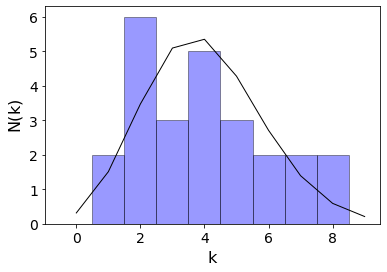

In [7]:
plt.xlabel(r"$\rm k$")
plt.ylabel(r'$\rm N(k)$')
plt.hist(degree_sequence,bins=range(0,int(maxk+2),1), align="left", histtype='bar', color="blue", alpha=0.4, edgecolor="black");
plt.plot(range(0,int(maxk+2),1),np.array(P(N,0,int(maxk+2),p))*N, linewidth=1, linestyle='-', c="black");

Die obere Abbildung zeigt die Verteilung der Knotengrade des erzeugten Zufallsgraphen und die zugehörige binomiale Verteilungsfunktion $N(k)=N\,P(k)$ der Knotengrade (schwarze Kurve). Die einzelnen blauen Kästchen des Balkendiagramms stellen die spezifische, zufällig erzeugte Realisierung des Zufallsgraphen dar, wohingegen die schwarze Kurve die analytische Binomialverteilung zeigt. Mittelt man über die einzelnen Verteilungsfunktionen N(k) mehrerer zufälliger Netzwerke, erzeugt man ein Ensemble-Mittelwert der möglichen Realisierungen des Zufallsgraphen.

Wir werden im Folgenden ein solches Ensemble-Mittel durch eine iterative Erzeugung mehrerer Zufallsgraphen erzeugen. Der Einfachheit halber erstellen wir die einzelnen Erdos and Renyi Zufallsgraphen mittels eines in NetworkX schon vordefinierten Graphengenerators: 

In [8]:
import matplotlib.animation as animation
from IPython.display import HTML

In [9]:
N = 35 
L = 100 
p=2*L/(N*(N-1))
av_deg=[]

fig = plt.figure()
ax = fig.gca()
ax.set_xlabel(r"$\rm k$")
ax.set_ylabel(r'$\rm N(k)$')

def animate(i):
    ax.cla()
    G = nx.erdos_renyi_graph(N, p)
    degree_sequence = []
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    av_deg.extend(degree_sequence) 
    maxk=max(degree_sequence)
    maxkav=max(av_deg)
    ax.plot(range(0,int(maxkav+2),1),np.array(P(N,0,int(maxkav+2),p)), linewidth=1, linestyle='-', c="black")
    ax.hist(degree_sequence,bins=range(0,int(maxk+2),1),density=1, align="left" ,histtype='bar', color="blue", alpha=0.1)
    ax.hist(av_deg,bins=range(0,int(maxkav+2),1),density=1, align="left" ,histtype='bar', color="black", alpha=0.7);
    ax.set_xlim(0,maxkav+2)
    ax.set_ylim(0,np.max(np.array(P(N,0,int(maxkav+2),p)))+0.2)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=50,interval=500)

plt.close(ani._fig)

HTML(ani.to_html5_video())

In der oberen Abbildung ist eine solche Ensemble-Mittelung anhand einer Animation veranschaulicht. Man erkennt deutlich, dass die über mehrere zufällige Netzwerke gemittelte Verteilung (dunkelgraue Kästchen) sich der analytischen Verteilung (schwarze Kurve) immer mehr annähert.

Eine weitere wichtige Eigenschaft des Netzwerkes ist die relative Größe des größten verbundenen Knotenclusters (Giant component, Hub) $N_G/N$. Zufällige Netzwerke mit kleinem mittlere Knotengrad $\left< k \right> < 1$ besitzen keinen ausgeprägten Giant Component ($N_G/N << 1$, subkritischer Bereich) und die einzelnen Knoten des Netzwerkes gliedern sich in viele kleinere zusammenhängende Cluster. Hat der mittlere Knotengrad des Netzwerks jedoch große Werte ($\left< k \right> > 1$), so formt sich eine Giant Component (superkritischer Bereich), die neben den vielen kleineren Clustern koexistiert. Für sehr große Werte ($\left< k \right> > \rm ln(N)$) absorbiert die Giant Component alle Knoten ($N_G/N = 1$, verbundener Bereich); (siehe Abb. 3.7 in <A href="http://networksciencebook.com/chapter/3" target=blank>Chapter 3: Albert-Laszlo Barabasi, Network Science</A>). Diese Eigenschaft wollen wir im Folgenden Visualisieren und stellen uns dazu zunächst den Graphen eines zufälligen Netzwerks mit $\left< k \right> < 1$ dar.

In [10]:
N = 40 
L = 20 
p=2*L/(N*(N-1))
av_deg=[]
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
avki=sum(degree_sequence)/N
print("Mittlerer Knotengrad:")
print(avki)

Mittlerer Knotengrad:
1.15


In [11]:
pos3d=nx.fruchterman_reingold_layout(G,dim=3)

In [12]:
node_x=[pos3d[k][0] for k in range(N)]
node_y=[pos3d[k][1] for k in range(N)]
node_z=[pos3d[k][2] for k in range(N)]
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
    edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
    edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
labels=[]
group=[]
for node in G.nodes():
    labels.append('Knoten '+str(node)+', Knotengrad = '+str(degree_sequence[node]))
    group.append(degree_sequence[node])

In [13]:
import plotly.graph_objects as go

In [14]:
edge_trace=go.Scatter3d(x=edge_x,
               y=edge_y,
               z=edge_z,
               mode='lines',
               line=dict(color='black', width=1.1),
               hoverinfo='none'
               )

node_trace=go.Scatter3d(x=node_x,
               y=node_y,
               z=node_z,
               mode='markers',
#               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color=group,
                             colorscale='YlGnBu',
                             line=dict(color='black', width=0.8)
                             ),
               text=labels,
               opacity=0.9,
               hoverinfo='text'
               )

In [15]:
axis=dict(showbackground=False,
          backgroundcolor="white",
          showline=False,
          zeroline=False,
          showgrid=True,
          gridcolor="rgb(244, 233, 245)",
          showticklabels=False,
          showaxeslabels=False,
          )

layout = go.Layout(
         width=700,
         height=700,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
    margin=dict(b=20,l=10,r=10,t=10),
    hovermode='closest',
   )
data=[node_trace,edge_trace]
fig=go.Figure(data=data, layout=layout)
fig.show()

Dieses Netzwerk mit kleinem mittlere Knotengrad $\left< k \right> < 1$ besitzt keinen ausgeprägten Giant Component ($N_G/N << 1$, subkritischer Bereich) und die einzelnen Knoten des Netzwerkes gliedern sich in viele kleinere zusammenhängende Cluster. Man kann sich diese Clustereigenschaften wie folgt in NetworkX berechnen:

In [16]:
ConnCom = sorted(nx.connected_components(G), key=len, reverse=True)
print("Gesamte Anzahl der Knoten im Netzwerk")
print(N)
print("Mittlerer Knotengrad:")
print(avki)
print("Globaler Clusterkoeffizient:")
print(nx.average_clustering(G))
print("Anzahl der Knoten im größten zusammenhängenden Cluster (Giant Component)")
print(len(ConnCom[0]))
print("Anzahl der Cluster im Netzwerk (einzelne separierte Knoten mitgezählt)")
print(len(ConnCom))

Gesamte Anzahl der Knoten im Netzwerk
40
Mittlerer Knotengrad:
1.15
Globaler Clusterkoeffizient:
0.0
Anzahl der Knoten im größten zusammenhängenden Cluster (Giant Component)
15
Anzahl der Cluster im Netzwerk (einzelne separierte Knoten mitgezählt)
17


Wir betrachten nun ein Netzwerk mit ($1 < \left< k \right> < \rm ln(N)$, superkritische Bereich). 

In [17]:
N = 40 
L = 35 
p=2*L/(N*(N-1))
av_deg=[]
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
avki=sum(degree_sequence)/N
print("Mittlerer Knotengrad")
print(avki)
print("ist größer als 1 aber kleiner als ln(N)=")
print(np.log(N))

Mittlerer Knotengrad
1.55
ist größer als 1 aber kleiner als ln(N)=
3.6888794541139363


In [18]:
pos3d=nx.fruchterman_reingold_layout(G,dim=3)
node_x=[pos3d[k][0] for k in range(N)]
node_y=[pos3d[k][1] for k in range(N)]
node_z=[pos3d[k][2] for k in range(N)]
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
    edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
    edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
labels=[]
group=[]
for node in G.nodes():
    labels.append('Knoten '+str(node)+', Knotengrad = '+str(degree_sequence[node]))
    group.append(degree_sequence[node])

edge_trace=go.Scatter3d(x=edge_x,
               y=edge_y,
               z=edge_z,
               mode='lines',
               line=dict(color='black', width=1.1),
               hoverinfo='none'
               )

node_trace=go.Scatter3d(x=node_x,
               y=node_y,
               z=node_z,
               mode='markers',
#               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color=group,
                             colorscale='YlGnBu',
                             line=dict(color='black', width=0.8)
                             ),
               text=labels,
               opacity=0.9,
               hoverinfo='text'
               )
axis=dict(showbackground=False,
          backgroundcolor="white",
          showline=False,
          zeroline=False,
          showgrid=True,
          gridcolor="rgb(244, 233, 245)",
          showticklabels=False,
          showaxeslabels=False,
          )

layout = go.Layout(
         width=700,
         height=700,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
    margin=dict(b=20,l=10,r=10,t=10),
    hovermode='closest',
   )
data=[node_trace,edge_trace]
fig=go.Figure(data=data, layout=layout)
fig.show()

Der mittlere Knotengrad des Netzwerks ist jetzt ($1 < \left< k \right> < \rm ln(N)$) und das Netzwerk befindet sich im superkritischen Bereich. Es hat sich eine Giant Component ausgebildet, jedoch existieren noch kleineren separate Clustern.

In [19]:
ConnCom = sorted(nx.connected_components(G), key=len, reverse=True)
print("Gesamte Anzahl der Knoten im Netzwerk")
print(N)
print("Mittlerer Knotengrad:")
print(avki)
print("Globaler Clusterkoeffizient:")
print(nx.average_clustering(G))
print("Anzahl der Knoten im größten zusammenhängenden Cluster (Giant Component)")
print(len(ConnCom[0]))
print("Anzahl der Cluster im Netzwerk (einzelne separierte Knoten mitgezählt)")
print(len(ConnCom))

Gesamte Anzahl der Knoten im Netzwerk
40
Mittlerer Knotengrad:
1.55
Globaler Clusterkoeffizient:
0.0
Anzahl der Knoten im größten zusammenhängenden Cluster (Giant Component)
27
Anzahl der Cluster im Netzwerk (einzelne separierte Knoten mitgezählt)
9


Wir betrachten nun ein Netzwerk mit  ($ \left< k \right> > \rm ln(N)$, $N_G/N = 1$, verbundener Bereich).

In [20]:
N = 40 
L = 120 
p=2*L/(N*(N-1))
av_deg=[]
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)
avki=sum(degree_sequence)/N
print("Mittlerer Knotengrad")
print(avki)
print("ist größer als als ln(N)=")
print(np.log(N))

Mittlerer Knotengrad
6.75
ist größer als als ln(N)=
3.6888794541139363


In [21]:
pos3d=nx.fruchterman_reingold_layout(G,dim=3)
node_x=[pos3d[k][0] for k in range(N)]
node_y=[pos3d[k][1] for k in range(N)]
node_z=[pos3d[k][2] for k in range(N)]
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
    edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
    edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
labels=[]
group=[]
for node in G.nodes():
    labels.append('Knoten '+str(node)+', Knotengrad = '+str(degree_sequence[node]))
    group.append(degree_sequence[node])

edge_trace=go.Scatter3d(x=edge_x,
               y=edge_y,
               z=edge_z,
               mode='lines',
               line=dict(color='black', width=1.1),
               hoverinfo='none'
               )

node_trace=go.Scatter3d(x=node_x,
               y=node_y,
               z=node_z,
               mode='markers',
#               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color=group,
                             colorscale='YlGnBu',
                             line=dict(color='black', width=0.8)
                             ),
               text=labels,
               opacity=0.9,
               hoverinfo='text'
               )
axis=dict(showbackground=False,
          backgroundcolor="white",
          showline=False,
          zeroline=False,
          showgrid=True,
          gridcolor="rgb(244, 233, 245)",
          showticklabels=False,
          showaxeslabels=False,
          )

layout = go.Layout(
         width=700,
         height=700,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
    margin=dict(b=20,l=10,r=10,t=10),
    hovermode='closest',
   )
data=[node_trace,edge_trace]
fig=go.Figure(data=data, layout=layout)
fig.show()

Für sehr große Werte ($\left< k \right> > \rm ln(N)$) existiert nur noch eine Giant Component (siehe Abb. 3.7 in <A href="http://networksciencebook.com/chapter/3" target=blank>Chapter 3: Albert-Laszlo Barabasi, Network Science</A>).

In [22]:
ConnCom = sorted(nx.connected_components(G), key=len, reverse=True)
print("Gesamte Anzahl der Knoten im Netzwerk")
print(N)
print("Mittlerer Knotengrad:")
print(avki)
print("Globaler Clusterkoeffizient:")
print(nx.average_clustering(G))
print("Anzahl der Knoten im größten zusammenhängenden Cluster (Giant Component)")
print(len(ConnCom[0]))
print("Anzahl der Cluster im Netzwerk (einzelne separierte Knoten mitgezählt)")
print(len(ConnCom))

Gesamte Anzahl der Knoten im Netzwerk
40
Mittlerer Knotengrad:
6.75
Globaler Clusterkoeffizient:
0.2043452380952381
Anzahl der Knoten im größten zusammenhängenden Cluster (Giant Component)
40
Anzahl der Cluster im Netzwerk (einzelne separierte Knoten mitgezählt)
1
